In [106]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 500

In [105]:
from sentence_transformers import SentenceTransformer, util
from datasets import load_from_disk
import numpy as np

In [5]:
ds = load_from_disk("datasets/sst2_batch16.hf/")

In [118]:
ds = ds.shuffle(seed=42)
train = ds['train']
sentences = [ex['sentence'] for ex in train][256:256+128]

In [119]:
model = SentenceTransformer("all-mpnet-base-v2")
embeddings = model.encode(sentences, convert_to_tensor=True)

In [120]:
embeddings

tensor([[ 0.0415,  0.0860,  0.0204,  ...,  0.0111, -0.0335, -0.0367],
        [-0.0424,  0.0305,  0.0131,  ...,  0.0261, -0.0048, -0.0213],
        [-0.0464,  0.0528, -0.0046,  ...,  0.0063, -0.0128, -0.0243],
        ...,
        [ 0.0356,  0.0687,  0.0089,  ...,  0.0417,  0.0298,  0.0043],
        [-0.0339,  0.1034,  0.0074,  ...,  0.0091, -0.0145, -0.0196],
        [-0.0498,  0.0165, -0.0179,  ...,  0.0269,  0.0382, -0.0374]],
       device='cuda:0')

In [121]:
pca = PCA()
#pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])

In [122]:
Xt = pca.fit_transform(embeddings.cpu())

In [123]:
y = []
bs = 16
for i in range(Xt.shape[0]):
    y.append(i // bs)

Text(0.5, 1.0, 'Random shuffling, SST-2')

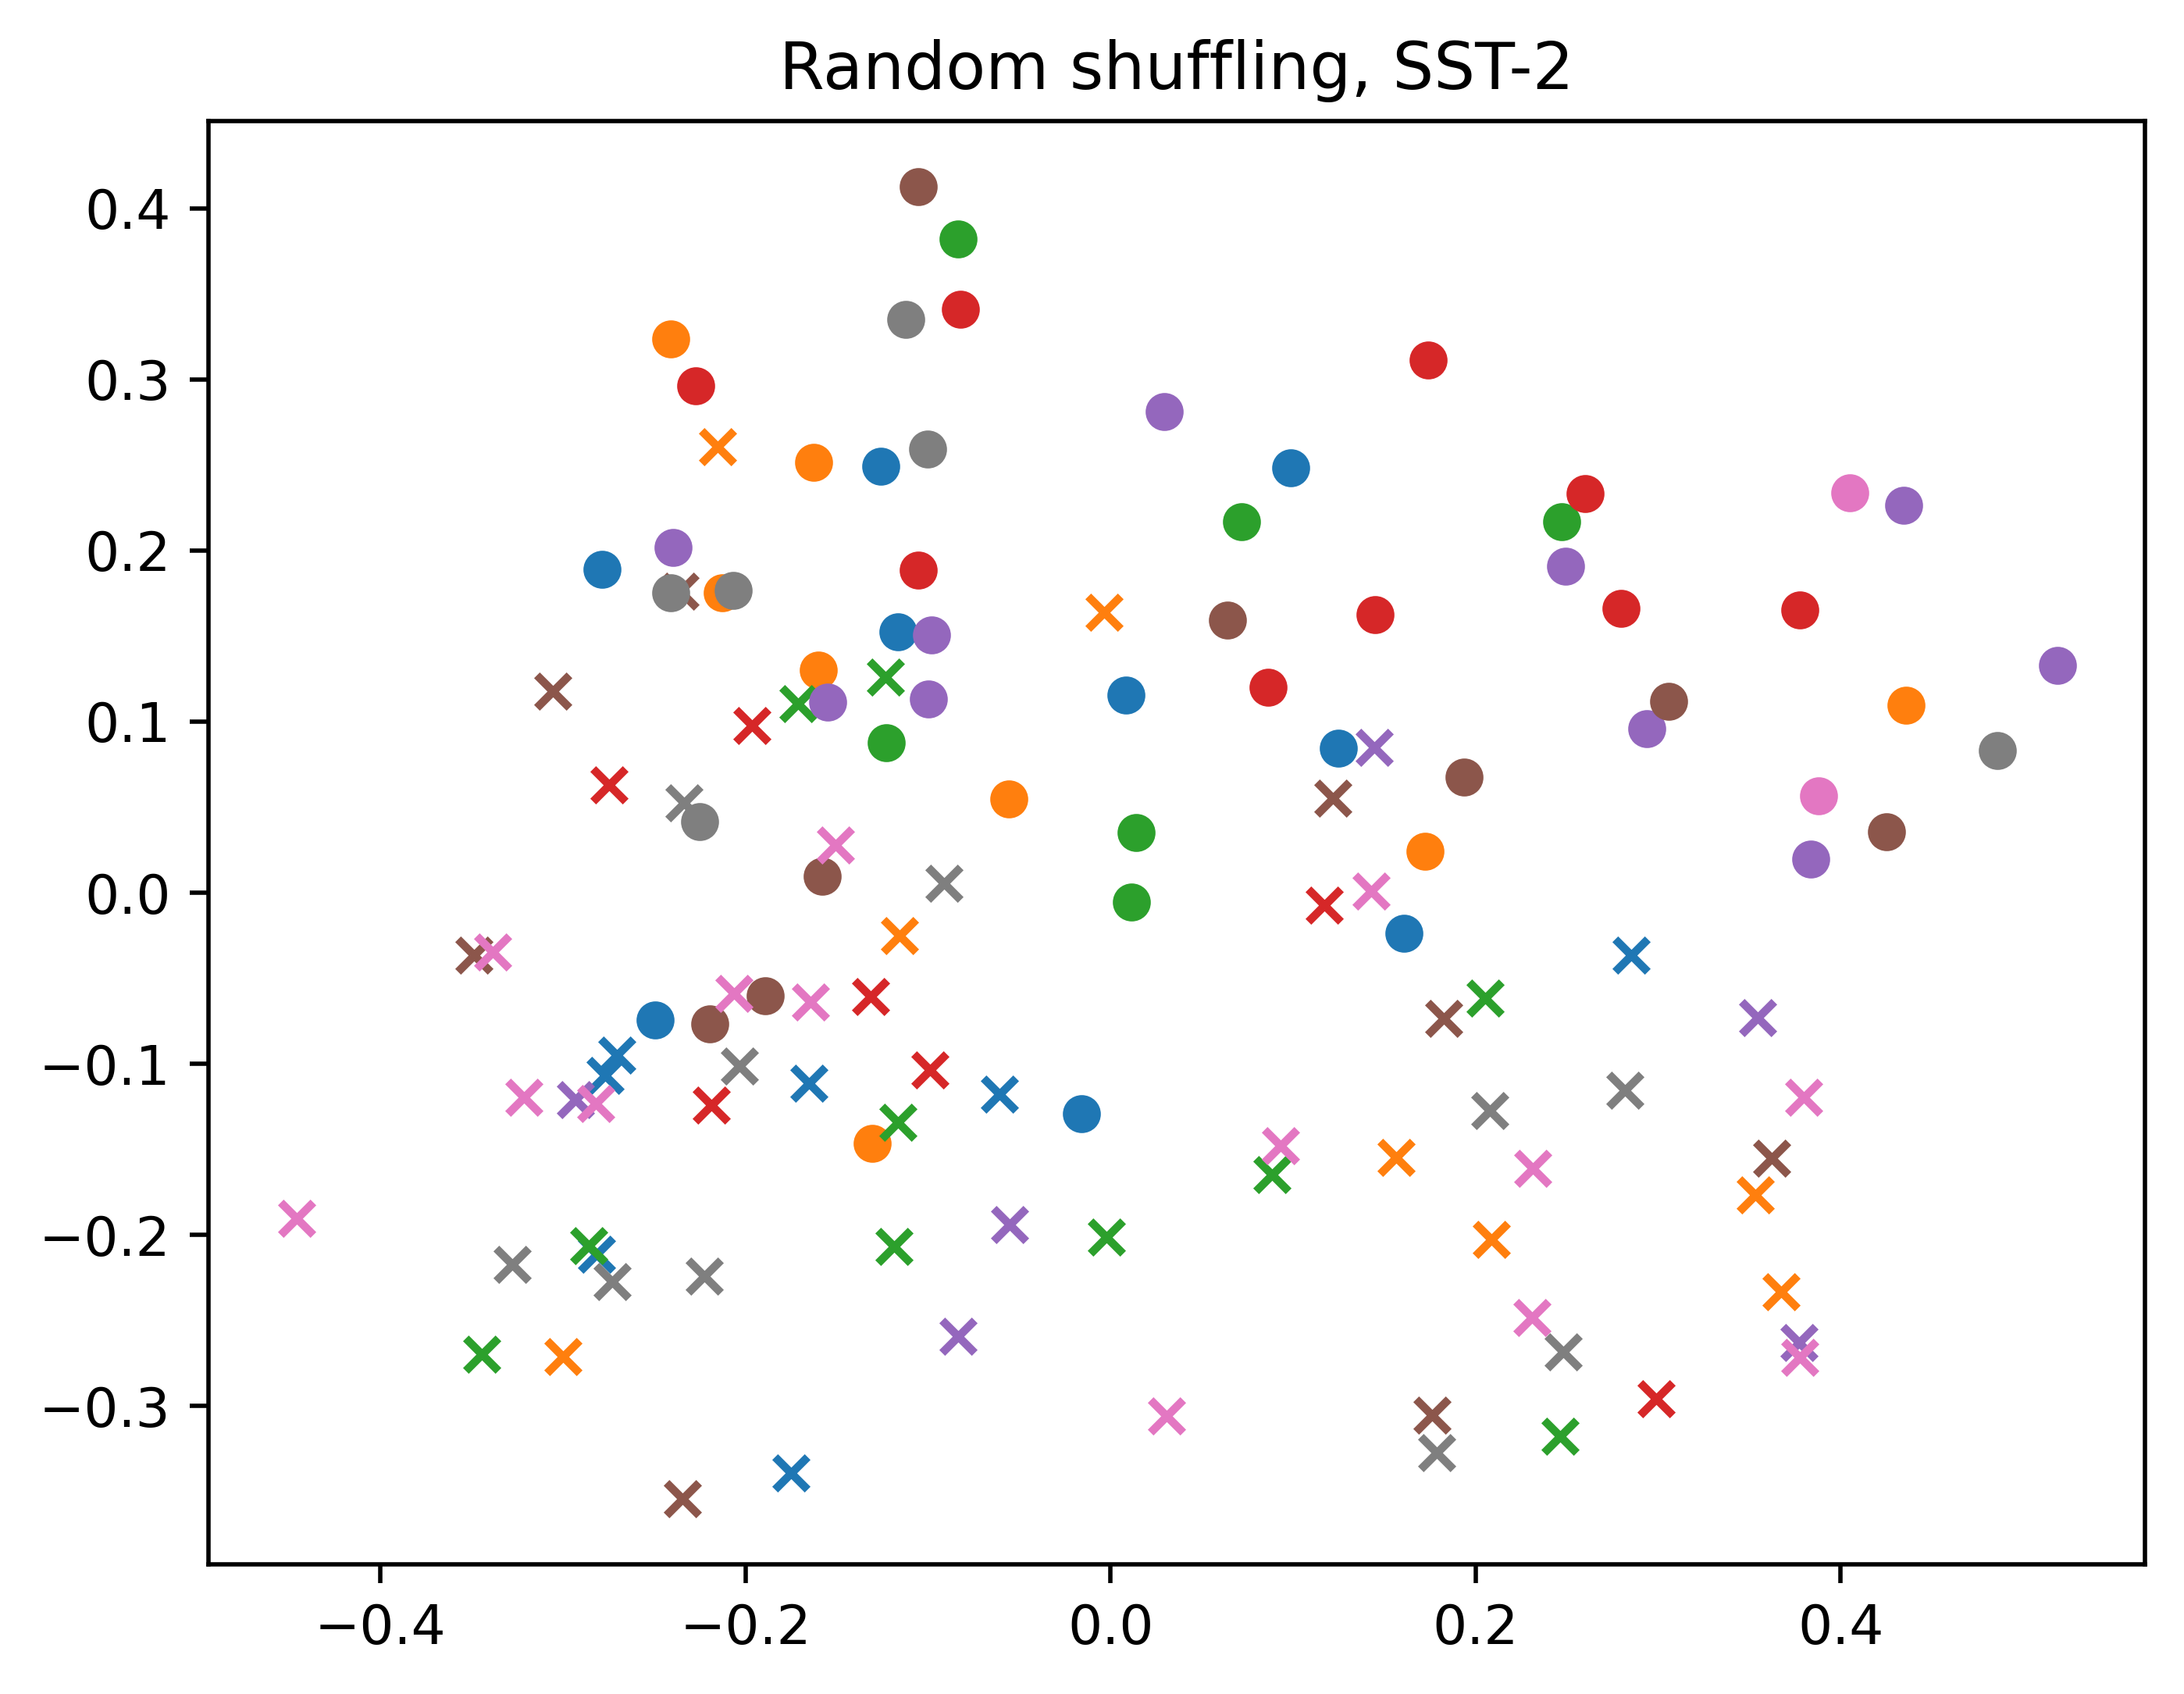

In [126]:
plt.figure()
#plot = plt.scatter(Xt[:,0], Xt[:, 1], c=y)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

offset = 256
for i in range(Xt.shape[0]):
    marker = "o" if train[i+offset]['label'] == 0 else "x"
    plt.scatter(Xt[i,0], Xt[i,1], c=colors[y[i]], marker=marker)
plt.title("Random shuffling, SST-2")


In [125]:
train[0]

{'sentence': 'repeated ', 'label': 0, 'idx': 34634}